## **Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import csv
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Input, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [32]:
train = pd.read_csv('/kaggle/working/train.csv')
image_paths = train['path']
pooled_features = []

for path in image_paths:
    pooled_feature = np.mean(np.load(path), axis=(0,1,2))  # Average across height and width dimensions
    pooled_features.append(pooled_feature)

pooled_features = np.array(pooled_features)
train['GAP'] = pooled_features

In [11]:
test = pd.read_csv('/kaggle/working/train.csv')
image_paths = test['path']

pooled_features = []

for path in image_paths:
    
    pooled_feature = np.mean(np.load(path), axis=(0,1,2))  # Average across height and width dimensions
    pooled_features.append(pooled_feature)

pooled_features = np.array(pooled_features)
test['GAP'] = pooled_features

In [61]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv("/kaggle/working/train.csv")

filtered_data = data[data['emotion'] != 5]

features = filtered_data['GAP'].values
emotion_labels = filtered_data['emotion'].values - 1
intensity = filtered_data['intensity'].values

models = Sequential()
models.add(Dense(150, input_shape=(1,), activation='relu'))
models.add(Dense(100, activation='relu'))
models.add(Dense(50, activation='relu'))
models.add(Dense(25, activation='relu'))
models.add(Dense(8, activation='softmax'))

sgd = SGD(learning_rate=0.001, momentum=0.9)
models.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = models.fit(features, emotion_labels, epochs=50, batch_size=32)


Epoch 1/50
1739/1739 [==============================] - 8s 4ms/step - loss: 1.9481 - accuracy: 0.1600
Epoch 2/50
1739/1739 [==============================] - 7s 4ms/step - loss: 1.9275 - accuracy: 0.1599
Epoch 3/50
1739/1739 [==============================] - 7s 4ms/step - loss: 1.9261 - accuracy: 0.1611
Epoch 4/50
1739/1739 [==============================] - 7s 4ms/step - loss: 1.9255 - accuracy: 0.1629
Epoch 5/50
1739/1739 [==============================] - 7s 4ms/step - loss: 1.9253 - accuracy: 0.1632
Epoch 6/50
1739/1739 [==============================] - 6s 4ms/step - loss: 1.9247 - accuracy: 0.1637
Epoch 7/50
1739/1739 [==============================] - 7s 4ms/step - loss: 1.9245 - accuracy: 0.1645
Epoch 8/50
1739/1739 [==============================] - 7s 4ms/step - loss: 1.9244 - accuracy: 0.1658
Epoch 9/50
1739/1739 [==============================] - 6s 4ms/step - loss: 1.9241 - accuracy: 0.1649
Epoch 10/50
1739/1739 [==============================] - 6s 4ms/step - loss: 1.923

In [111]:
predicted_probabilities = model.predict(features)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
correct_labels = emotion_labels.copy()
correct_labels[correct_labels != 5] = predicted_labels[correct_labels != 5]

accuracy = np.mean(correct_labels == emotion_labels)
print("Final Accuracy:", accuracy*100)

1739/1739 [==============================] - 3s 2ms/step
Final Accuracy: 30.77241106577268


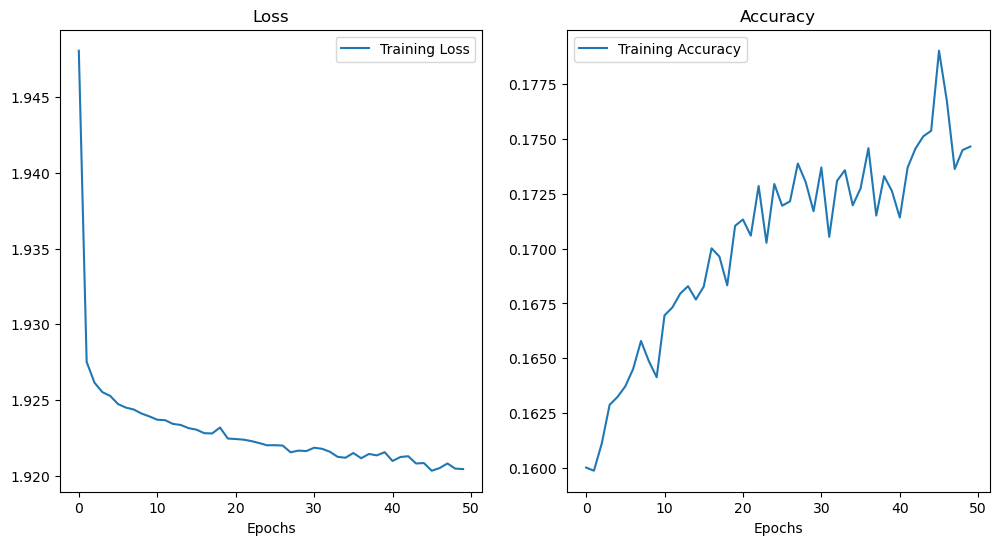

In [62]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [108]:
test_data = pd.read_csv("/kaggle/working/test.csv")

test_features = test_data['GAP'].values

test_labels = test_data['emotion'].values
predictions = models.predict(test_features)
final_predictions = np.argmax(predictions, axis=1) 

final_predictions[test_features < 70] = 4 

accuracy = np.mean(final_predictions == test_labels)
print("Accuracy on the test set:", accuracy * 100)




430/430 [==============================] - 1s 2ms/step
Accuracy on the test set: 9.062454505750473


430/430 [==============================] - 2s 4ms/step


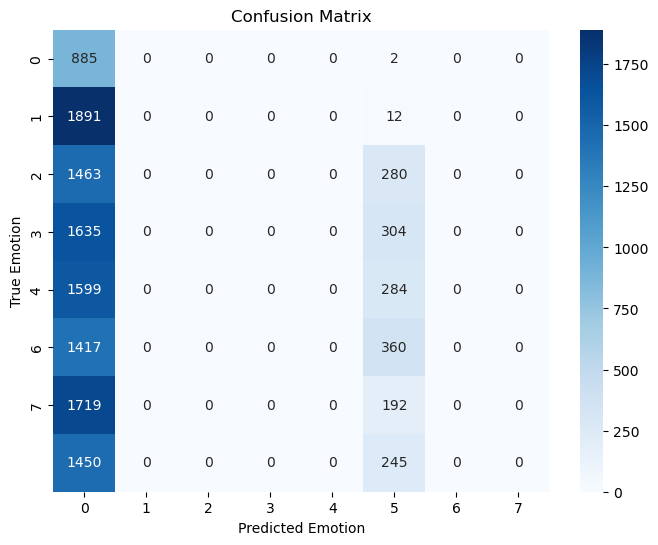

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

predictions = np.argmax(models.predict(test_features), axis=1)
adjusted_predictions = predictions.copy()
adjusted_predictions[test_features < 70] = 4

cm = confusion_matrix(test_labels, adjusted_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1', '2', '3', '4', '5','6', '7'], yticklabels=['0', '1', '2', '3', '4', '6', '7'])
plt.xlabel('Predicted Emotion')
plt.ylabel('True Emotion')
plt.title('Confusion Matrix')
plt.show()


In [115]:
from sklearn.metrics import classification_report

predictions = np.argmax(models.predict(test_features), axis=1)
adjusted_predictions = predictions.copy()
adjusted_predictions[test_features < 70] = 4

report = classification_report(test_labels, adjusted_predictions, labels=[0, 1, 2, 3, 4, 6, 7])

print(report)


430/430 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.07      1.00      0.14       887
           2       0.00      0.00      0.00      1903
           3       0.00      0.00      0.00      1743
           4       0.00      0.00      0.00      1939
           6       0.21      0.20      0.21      1777
           7       0.00      0.00      0.00      1911

   micro avg       0.09      0.12      0.10     10160
   macro avg       0.04      0.17      0.05     10160
weighted avg       0.04      0.12      0.05     10160



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.